# 1) Resumo

---
# 2) Pre-analise

## 2.1) Importando libs

In [74]:
import pandas as pd
#
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
#
import matplotlib.pyplot as plt
#
from scipy.stats import uniform

## 2.2) Minhas Funções

In [2]:
import sys
sys.path.insert(1, "../../")

from src.plota_graficos import plota_treino_teste_auc
from src.ml import retorna_x_y, intervalo_de_confianca, logistic_regression_sumary, roda_modelo_direto, roda_modelo_cv,\
                   roda_modelo_cv_randomized_search_cv, obtem_os_resultados_SearchCV, cv_val_split

from src.info import proporcao_y, porcentagem_teste_treino_val

---
# 3) Lendo os dados

In [3]:
path = "https://raw.githubusercontent.com/HenriqueCCdA/BC_DS_Projeto_Final/main/Dados/Tratados/dados_sem_coor_acima_do_valor_de_corte.csv"

dados_com_corte = pd.read_csv(path)

dados_com_corte.head(n=5)

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,ICU
0,1,0.111111,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-0.247863,1
1,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-0.435897,1
2,0,-0.333333,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-0.299145,0
3,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-0.076923,0
4,0,-1.000000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.884337,-1.000000,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.247863,0


In [4]:
dados_com_corte.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 53 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE_ABOVE65                   351 non-null    int64  
 1   AGE_PERCENTIL                 351 non-null    float64
 2   GENDER                        351 non-null    int64  
 3   DISEASE GROUPING 1            351 non-null    float64
 4   DISEASE GROUPING 2            351 non-null    float64
 5   DISEASE GROUPING 3            351 non-null    float64
 6   DISEASE GROUPING 4            351 non-null    float64
 7   DISEASE GROUPING 5            351 non-null    float64
 8   DISEASE GROUPING 6            351 non-null    float64
 9   HTN                           351 non-null    float64
 10  IMMUNOCOMPROMISED             351 non-null    float64
 11  OTHER                         351 non-null    float64
 12  ALBUMIN_MEDIAN                351 non-null    float64
 13  BE_AR

In [5]:
dados_com_corte.describe()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MAX,ICU
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.458689,-0.046534,0.381766,0.108262,0.022792,0.091168,0.019943,0.128205,0.045584,0.196581,...,-0.841746,-0.960159,-0.045990,-0.318411,-0.240403,-0.468207,0.097772,0.760029,-0.313074,0.461538
std,0.499002,0.640366,0.486513,0.311155,0.149453,0.288259,0.140004,0.334795,0.208879,0.397980,...,0.135197,0.098682,0.253692,0.274796,0.278347,0.213326,0.272230,0.116880,0.185592,0.499230
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.971084,-1.000000,-0.654321,-0.938462,-0.823899,-0.954802,-0.571429,0.263158,-0.760684,0.000000
25%,0.000000,-0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.898795,-0.983811,-0.185185,-0.538462,-0.415094,-0.593220,-0.107143,0.684211,-0.418803,0.000000
50%,0.000000,-0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.874699,-0.978029,-0.037037,-0.369231,-0.283019,-0.525424,0.071429,0.789474,-0.299145,0.000000
75%,1.000000,0.555556,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.821687,-0.971784,0.086420,-0.153846,-0.094340,-0.389831,0.250000,0.842105,-0.213675,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.513241,0.604938,0.553846,1.000000,0.830508,0.964286,1.000000,0.487179,1.000000


In [75]:
x_cv, x_val, y_cv, y_val = cv_val_split(dados_com_corte, p_val = .15)

In [76]:
proporcao_y(dados_com_corte['ICU'])
proporcao_y(y_val)
proporcao_y(y_cv )

Proporcao do ICU
Campo 0 ->  53.85%
Campo 1 ->  46.15%
Proporcao do ICU
Campo 0 ->  54.72%
Campo 1 ->  45.28%
Proporcao do ICU
Campo 0 ->  53.69%
Campo 1 ->  46.31%


In [77]:
porcentagem_teste_treino_val(dados_com_corte['ICU'], y_val, y_cv)

Número total de entradas                         : 351
Número total de entradas para validacao          : 53
Número total de entradas para o Cross Validation : 298


# 4) Modelo de ML

# 4.1) Rodando o modelo de maneira direta

In [78]:
modelo_lr = LogisticRegression()

In [79]:
roda_modelo_direto(modelo_lr, x_cv, y_cv, seed = 42258)

Tamanho teste :   30
Tamanho treino:  268
AUC Teste     : 0.80
AUC Treino    : 0.85


# 4.1) Rodando o modelo usando o Cross Validation

In [80]:
_, _ = roda_modelo_cv(modelo_lr, x_cv, y_cv)

AUC Teste : 0.77 - [0.68 - 0.87]
AUC Treino: 0.85 - [0.83 - 0.88]


## 4.2) Rodando o modelo usando cross Validation e busca pelos melhores hyperparametros

> Aqui foi usado **RandomizedSearchCV** com **10** iterações. O único hyperparametro procurado foi **C**. O intervalor de busca  de **C** foi **[0, 4]**.
A opção **refit** foi deixado como **true** logo depois que o melhor modelo for selecioando o RandomizedSearchCV **re-treina** esse modelo com o dataset completo (treino+teste). 

In [81]:
parameters = {'C': uniform(loc=0, scale=4)}
modelo = LogisticRegression(max_iter=1000, tol=1e-6)

resultados, melhor_modelo, melhores_hyperparametros  = roda_modelo_cv_randomized_search_cv(modelo,
                                                                                            x_cv,
                                                                                            y_cv,
                                                                                            parameters,
                                                                                            n_splits=5,
                                                                                            n_repeats=10,
                                                                                            n_iter=20,
                                                                                            seed=14715)

Fitting 50 folds for each of 20 candidates, totalling 1000 fits


In [82]:
resultados.head(n=5)

,paramentros,media_teste,media_treino,std_teste,std_treino,mean_fit_time,std_fit_time,mean_score_time,std_score_time,rank_test_score
0,{'C': 2.9403726439047437},0.765710,0.867434,0.047053,0.009485,0.082329,0.016573,0.007721,0.001563,13
1,{'C': 0.8236321513787566},0.774841,0.850324,0.044493,0.009077,0.042460,0.007677,0.007561,0.002632,1
2,{'C': 1.8107081253404766},0.770137,0.861051,0.045532,0.009458,0.057919,0.012576,0.007160,0.002949,5
3,{'C': 1.4507591152545065},0.771309,0.858087,0.045024,0.009393,0.048479,0.006326,0.006520,0.001044,3
4,{'C': 1.3163817298661398},0.771752,0.856748,0.044983,0.009368,0.050259,0.023128,0.006741,0.001146,2


> O Melhor modelo acho foi:

In [83]:
melhor_modelo

LogisticRegression(C=0.8236321513787566, max_iter=1000, tol=1e-06)

> O Melhor hyperparametro foi:

In [84]:
melhores_hyperparametros

{'C': 0.8236321513787566}

### Plotando a curva do Cross Vaditaion

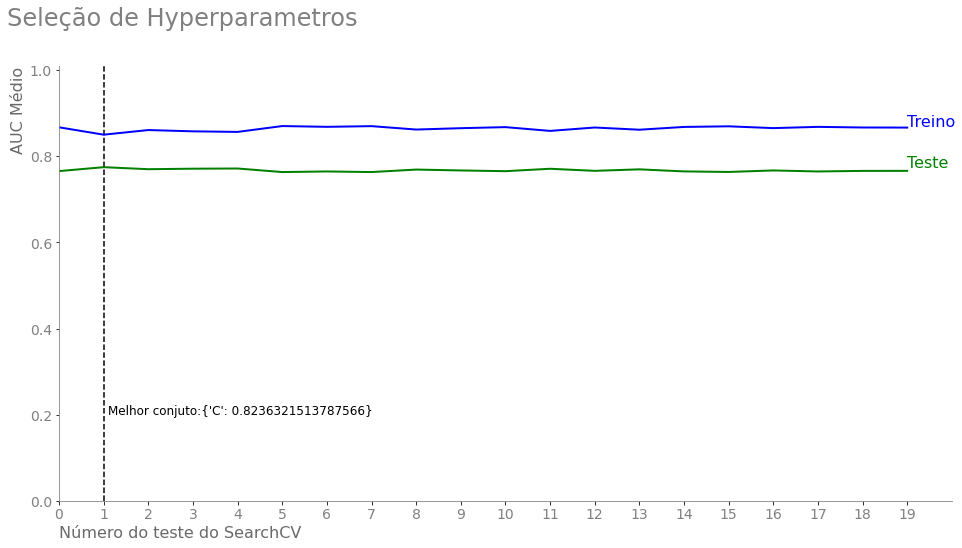

In [85]:
plota_treino_teste_auc('Seleção de Hyperparametros', 
                       resultados['media_teste'],
                       resultados['media_treino'],
                       resultados['rank_test_score'],
                       melhores_hyperparamentros)

> Neste gráfico temos o valor médio de AUC obtido pelo CrossValidation para dados de **Treino** e **Teste**. O Melhor Seleção de Hyperparametro foi C = **0.82**

## 4.2) Avaliando o melhor modelo

> Agora vamos avaliar o melhor modelo encontrado utilizando o dados de validação.

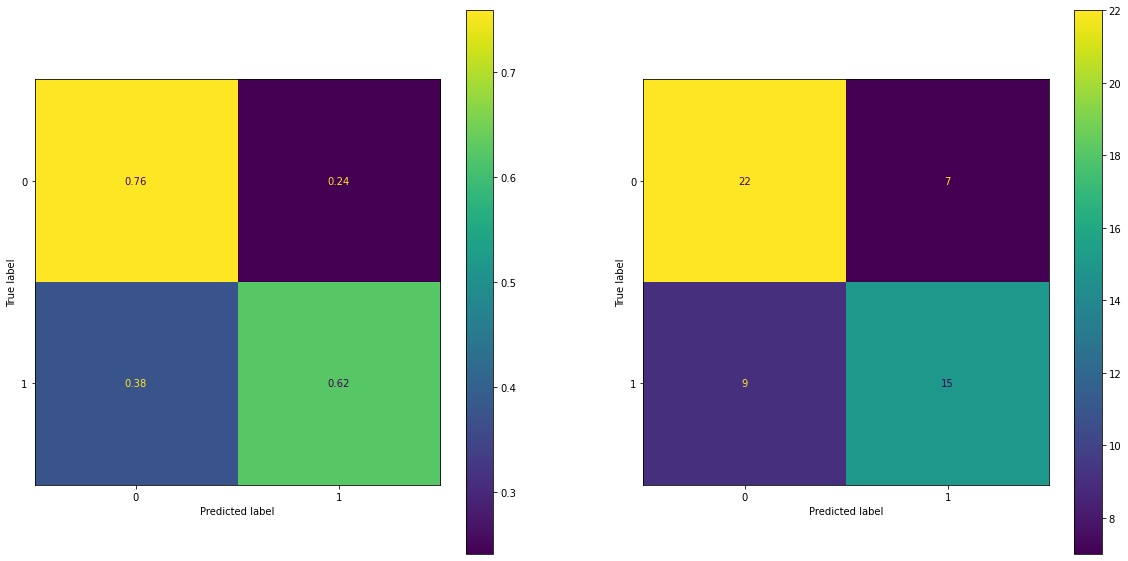

In [86]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

plot_confusion_matrix(melhor_modelo, x_val, y_val, ax=ax0, normalize='true')
plot_confusion_matrix(melhor_modelo, x_val, y_val, ax=ax1)

In [87]:
(tn, fp), (fn, tp) = confusion_matrix(y_val, melhor_modelo.predict(x_val))

In [88]:
print(tn, fp, fn, tp)

22 7 9 15


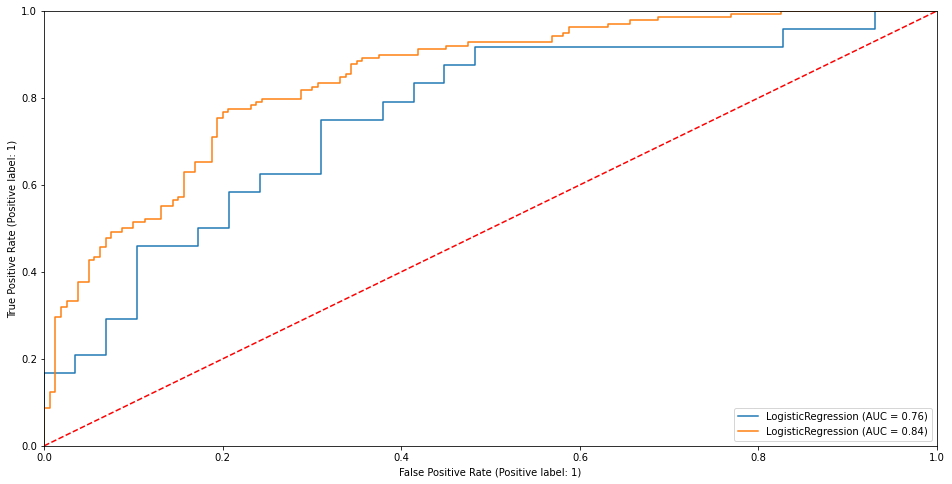

In [90]:
fig, ax = plt.subplots(figsize=(16,8))

plot_roc_curve(melhor_modelo, x_val, y_val, ax = ax) 
plot_roc_curve(melhor_modelo, x_cv, y_cv, ax = ax) 
ax.plot([0, 1], [0, 1], color = "red", ls ='--')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.show()